# NeuralGCM simulation datasets

Before running NeuralGCM yourself, consider if you can use one of our pre-computed simulation datasets. All are available in the Zarr format on Google Cloud Storage the under the Creative Commons [CC-BY 4.0](https://creativecommons.org/licenses/by-sa/4.0/) license.

We currently have two types of datasets available:

- Medium-range weather forecasts for 2020, distributed as part of [WeatherBench2](https://weatherbench2.readthedocs.io/en/latest/):

  - **15 day weather forecasts for 2020 from a deterministic model at 0.7° resolution (NeuralGCM-0.7).** Forecasts regridded to different resolutions are available at [`gs://weatherbench2/datasets/neuralgcm_deterministic`](https://console.cloud.google.com/storage/browser/weatherbench2/datasets/neuralgcm_deterministic): `2020-512x256.zarr` , `2020-240x121_equiangular_with_poles_conservative.zarr`, `2020-64x32_equiangular_conservative.zarr`
  - **15 day weather forecasts for 2020 from a stochastic model at 1.4° resolution (NeuralGCM-ENS).** Forecasts regridded to different resolutions are available at [`gs://weatherbench2/datasets/neuralgcm_ens`](https://console.cloud.google.com/storage/browser/weatherbench2/datasets/neuralgcm_ens) : `2020-256x128.zarr`, `2020-240x121_equiangular_with_poles_conservative.zarr`, `2020-240x121_equiangular_with_poles_conservative_mean.zarr`, `2020-64x32_equiangular_conservative.zarr`, `2020-64x32_equiangular_conservative_mean.zarr`

- Yearly to decadal atmosphere-only climate simulations:

  -   **2-year runs from a deterministic model at 1.4° resolution (NeuralGCM-1.4).**  This dataset includes snapshots every 12 hours and is used in the [NeuralGCM paper](https://www.nature.com/articles/s41586-024-07744-y) to evaluate the seasonal cycle (e.g., Figure 4a,i): [`gs://neuralgcm/amip_runs/v1_deterministic_1_4_deg/2019-to-2021_256x128_gauss_37-level_stride12h.zarr`](https://console.cloud.google.com/storage/browser/neuralgcm/amip_runs/v1_deterministic_1_4_deg/2019-to-2021_256x128_gauss_37-level_stride12h.zarr)
  -   **40-year simulations from a deterministic model at 2.8° resolution (NeuralGCM-2.8).** This dataset includes snapshots every 6 hours and is used in the NeuralGCM paper to evaluate decadal (AMIP) runs: [`gs://neuralgcm/amip_runs/v1_deterministic_2_8_deg/1980-to-2020_128x64_gauss_37-level_stride6h.zarr`](https://console.cloud.google.com/storage/browser/neuralgcm/amip_runs/v1_deterministic_2_8_deg/1980-to-2020_128x64_gauss_37-level_stride6h.zarr)
  -   **20-year simulations from a stochastic NeuralGCM model with precipitation at 2.8° resolution.** This dataset includes snapshots every 3 hours and accumulated precipitation. It is described in an [arXiv pre-print](https://arxiv.org/pdf/2412.11973): [`gs://neuralgcm/amip_runs/v1_precip_stochastic_2_8_deg/2001-to-2021_128x64_gauss_37-level_stride3h.zarr`](https://console.cloud.google.com/storage/browser/neuralgcm/amip_runs/v1_precip_stochastic_2_8_deg/2001-to-2021_128x64_gauss_37-level_stride3h.zarr)


Below, we show how to open and inspect these datsets. You'll need Xarray, Zarr and GCSFS installed:

In [ ]:
! pip install -q -U zarr xarray gcsfs
import xarray
import gcsfs
import zarr

Details on coordinate axes:

- **time:**  The date and time when the simulation was initialized.
- **prediction_timedelta:** Time delta (stored as `timedelta64[ns]`) since the simulation was initialized.
- **longitude:** Longitude in degrees.
- **latitude:** Latitude in degrees.
- **level:** Pressure level (in hPa) as the vertical coordinate.



## Medium-range weather forecasts for 2020

### 15 day weather forecasts from the 0.7° deterministic model (NeuralGCM-0.7)

Corresponding model checkpoint: `gs://neuralgcm/models/v1/deterministic_0_7_deg.pkl`


In [2]:
# output available at different resolutions:
# `2020-512x256.zarr`  (original)
# `2020-240x121_equiangular_with_poles_conservative.zarr`
# `2020-64x32_equiangular_conservative.zarr`
path = 'gs://weatherbench2/datasets/neuralgcm_deterministic/2020-512x256.zarr'
ngcm_0_7 = xarray.open_zarr(path, storage_options=dict(token='anon'))
ngcm_0_7

<xarray.Dataset> Size: 4TB
Dimensions:                              (time: 797, prediction_timedelta: 31,
                                          longitude: 512, latitude: 256,
                                          level: 37)
Coordinates:
  * latitude                             (latitude) float64 2kB -89.46 ... 89.46
  * level                                (level) int64 296B 1 2 3 ... 975 1000
  * longitude                            (longitude) float64 4kB 0.0 ... 359.3
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 248B ...
  * time                                 (time) datetime64[ns] 6kB 2019-12-15...
Data variables:
    P_minus_E_cumulative                 (time, prediction_timedelta, longitude, latitude) float32 13GB dask.array<chunksize=(1, 1, 512, 256), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
    wind_speed                           (time, prediction_timedelta, level, longitude, latitude) float32 479GB dask.array<chunksize=(1, 1, 37, 512, 256), meta=np.ndarray>
Attributes:
    experiment_id:  67001173
    worker_id:      1

### 15 day weather forecasts from the 1.4° stochastic model (NeuralGCM-ENS)

Corresponding model checkpoint: `gs://neuralgcm/models/v1/stochastic_1_4_deg.pkl`


In [3]:
# output available at different resolutions:
# `2020-256x128.zarr`  (original)
# `2020-240x121_equiangular_with_poles_conservative.zarr`
# `2020-240x121_equiangular_with_poles_conservative_mean.zarr`
# `2020-64x32_equiangular_conservative.zarr`
# `2020-64x32_equiangular_conservative_mean.zarr
path = 'gs://weatherbench2/datasets/neuralgcm_ens/2020-256x128.zarr'
ngcm_ens = xarray.open_zarr(path, storage_options=dict(token='anon'))
ngcm_ens

<xarray.Dataset> Size: 49TB
Dimensions:                              (realization: 50, time: 797,
                                          prediction_timedelta: 32, level: 37,
                                          longitude: 256, latitude: 128)
Coordinates:
  * latitude                             (latitude) float64 1kB -88.93 ... 88.93
  * level                                (level) int64 296B 1 2 3 ... 975 1000
  * longitude                            (longitude) float64 2kB 0.0 ... 358.6
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 256B ...
  * realization                          (realization) int64 400B 0 1 ... 48 49
  * time                                 (time) datetime64[ns] 6kB 2019-12-15...
Data variables:
    geopotential                         (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    specific_cloud_ice_water_content     (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    specific_cloud_liquid_water_content  (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    specific_humidity                    (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    temperature                          (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    u_component_of_wind                  (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    v_component_of_wind                  (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
    wind_speed                           (realization, time, prediction_timedelta, level, longitude, latitude) float32 6TB dask.array<chunksize=(50, 1, 2, 1, 256, 128), meta=np.ndarray>
Attributes:
    experiment_id:  73974210
    worker_id:      3

## Yearly to decadal climate simulations

### 2-year 1.4 degree determinisic NeuralGCM model

Corresponding model checkpoint: `gs://neuralgcm/models/v1/deterministic_1_4_deg.pkl`


In [4]:
path = 'gs://neuralgcm/amip_runs/v1_deterministic_1_4_deg/2019-to-2021_256x128_gauss_37-level_stride12h.zarr/'
# ngcm_1_4 = xarray.open_zarr(gcs.get_mapper(path), storage_options=dict(token='anon'))
ngcm_1_4 = xarray.open_zarr(path, storage_options=dict(token='anon'))
ngcm_1_4

<xarray.Dataset> Size: 2TB
Dimensions:                              (time: 37, prediction_timedelta: 1461,
                                          longitude: 256, latitude: 128,
                                          level: 37)
Coordinates:
  * latitude                             (latitude) float64 1kB -88.93 ... 88.93
  * level                                (level) int64 296B 1 2 3 ... 975 1000
  * longitude                            (longitude) float64 2kB 0.0 ... 358.6
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 12kB ...
  * time                                 (time) datetime64[ns] 296B 2019-01-0...
Data variables:
    P_minus_E_cumulative                 (time, prediction_timedelta, longitude, latitude) float32 7GB dask.array<chunksize=(1, 1, 256, 128), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 262GB dask.array<chunksize=(1, 1, 37, 256, 128), meta=np.ndarray>
Attributes:
    experiment_id:  66950211
    worker_id:      1

### 40-year runs 2.8 degree determinitic NeuralGCM model

Corresponding model checkpoint: `gs://neuralgcm/models/v1/deterministic_2_8_deg.pkl`


In [6]:
path = 'gs://neuralgcm/amip_runs/v1_deterministic_2_8_deg/1980-to-2020_128x64_gauss_37-level_stride6h.zarr/'
ngcm_2_8 = xarray.open_zarr(path, storage_options=dict(token='anon'))
ngcm_2_8

<xarray.Dataset> Size: 18TB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 58449,
                                          level: 37, longitude: 128,
                                          latitude: 64)
Coordinates:
  * latitude                             (latitude) float64 512B -87.86 ... 8...
  * level                                (level) int64 296B 1 2 3 ... 975 1000
  * longitude                            (longitude) float64 1kB 0.0 ... 357.2
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 468kB ...
  * time                                 (time) datetime64[ns] 296B 1980-01-0...
Data variables:
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 3TB dask.array<chunksize=(1, 1, 37, 128, 64), meta=np.ndarray>
Attributes:
    experiment_id:  70001146
    worker_id:      1

### 20-year runs 2.8 degree stochastic NeuralGCM model with precipitation

Corresponding model checkpoint: `gs://neuralgcm/models/v1_precip/stochastic_precip_2_8_deg.pkl`


In [9]:
path = 'gs://neuralgcm/amip_runs/v1_precip_stochastic_2_8_deg/2001-to-2021_128x64_gauss_37-level_stride3h.zarr'
ngcm_2_8_precip = xarray.open_zarr(path, storage_options=dict(token='anon'))
ngcm_2_8_precip

<xarray.Dataset> Size: 2TB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 58408,
                                          surface: 1, longitude: 128,
                                          latitude: 64, level: 3)
Coordinates:
  * latitude                             (latitude) float64 512B -87.86 ... 8...
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 1kB 0.0 ... 357.2
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 467kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(1, 8, 1, 128, 64), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(1, 8, 1, 128, 64), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(1, 8, 3, 128, 64), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In this dataset, `precipitation_cumulative_mean` indicates cumulative precipitation (in meters) from the start of the simulation (i.e., from `prediction_timedelta=0`).

This makes it straightforward to calculate mean precipitation without needing to load the entire 71 GB dataset from storage:

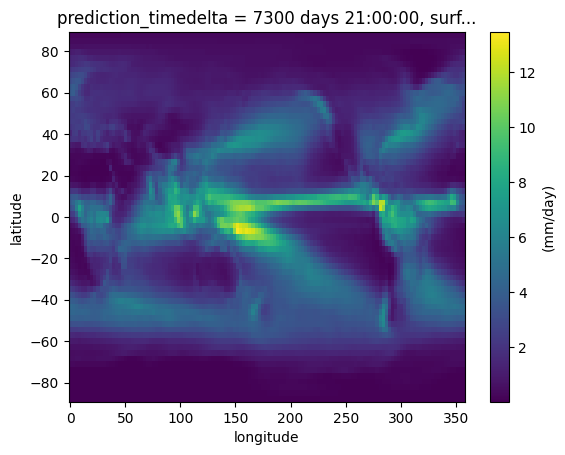

In [13]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = ngcm_2_8_precip.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-1
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(ngcm_2_8_precip.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

To calculate precipitation over shorter internals, use `.diff('prediction_timedelta')`:

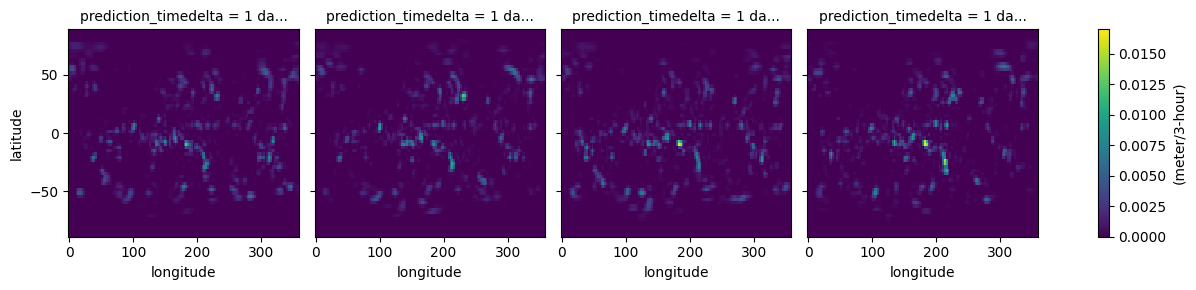

In [14]:
ngcm_2_8_precip.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=slice(10, 15)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/3-hour)'},
)  # In m per 3 hours